## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
#import yfinance as yf
#yf.pdr_override()
from matplotlib import pyplot as plt
import datetime

### 2. Load the adjusted closings for the top 5 tech stocks.

In [3]:
#stock_data=web.get_data_tiingo(["MSFT","AMZN","AAPL","GOOG","META"], api_key= 'my_tiingo_API')

In [26]:
stock_data.to_csv("stock_data.csv")

In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6290 entries, ('MSFT', Timestamp('2018-04-02 00:00:00+0000', tz='UTC')) to ('META', Timestamp('2023-03-29 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        6290 non-null   float64
 1   high         6290 non-null   float64
 2   low          6290 non-null   float64
 3   open         6290 non-null   float64
 4   volume       6290 non-null   int64  
 5   adjClose     6290 non-null   float64
 6   adjHigh      6290 non-null   float64
 7   adjLow       6290 non-null   float64
 8   adjOpen      6290 non-null   float64
 9   adjVolume    6290 non-null   int64  
 10  divCash      6290 non-null   float64
 11  splitFactor  6290 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 650.5+ KB


In [5]:
stock_data.head()  

close   high    low   open    volume  \
symbol date                                                              
MSFT   2018-04-02 00:00:00+00:00  88.52  90.88  87.51  90.47  48515417   
       2018-04-03 00:00:00+00:00  89.71  90.05  87.89  89.58  37213837   
       2018-04-04 00:00:00+00:00  92.33  92.76  87.73  87.85  35559956   
       2018-04-05 00:00:00+00:00  92.38  93.07  91.40  92.44  29771881   
       2018-04-06 00:00:00+00:00  90.23  92.46  89.48  91.49  38026000   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
MSFT   2018-04-02 00:00:00+00:00  83.516581  85.743186  82.563669  85.356361   
       2018-04-03 00:00:00+00:00  84.639318  84.960100  82.922190  84.516666   
       2018-04-04 00:00:00+00:00  87.111228  87.516923  82.771234  82.884451   
       2018-04-05 00:00:00+00:00  87.158402  87.809401  86.233794  87.215010   
       2018-04-06 00:00:00+00:00  85.129926  87.233880  84.422318  86.318707   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
MSFT   2018-04-02 00:00:00+00:00   48515417      0.0          1.0  
       2018-04-03 00:00:00+00:00   37213837      0.0          1.0  
       2018-04-04 00:00:00+00:00   35559956      0.0          1.0  
       2018-04-05 00:00:00+00:00   29771881      0.0          1.0  
       2018-04-06 00:00:00+00:00   38026000      0.0          1.0

In [6]:
stock_data=stock_data.reset_index()
stock_data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2018-04-02 00:00:00+00:00,88.52,90.88,87.5100,90.47,48515417,83.516581,85.743186,82.563669,85.356361,48515417,0.0,1.0
1,MSFT,2018-04-03 00:00:00+00:00,89.71,90.05,87.8900,89.58,37213837,84.639318,84.960100,82.922190,84.516666,37213837,0.0,1.0
2,MSFT,2018-04-04 00:00:00+00:00,92.33,92.76,87.7300,87.85,35559956,87.111228,87.516923,82.771234,82.884451,35559956,0.0,1.0
3,MSFT,2018-04-05 00:00:00+00:00,92.38,93.07,91.4000,92.44,29771881,87.158402,87.809401,86.233794,87.215010,29771881,0.0,1.0
4,MSFT,2018-04-06 00:00:00+00:00,90.23,92.46,89.4800,91.49,38026000,85.129926,87.233880,84.422318,86.318707,38026000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,META,2023-03-23 00:00:00+00:00,204.28,207.88,202.1500,202.84,27389669,204.280000,207.880000,202.150000,202.840000,27389669,0.0,1.0
6286,META,2023-03-24 00:00:00+00:00,206.01,207.58,203.5500,205.18,27733042,206.010000,207.580000,203.550000,205.180000,27733042,0.0,1.0
6287,META,2023-03-27 00:00:00+00:00,202.84,205.86,201.3600,204.81,18527184,202.840000,205.860000,201.360000,204.810000,18527184,0.0,1.0
6288,META,2023-03-28 00:00:00+00:00,200.68,201.03,197.9000,200.15,19127295,200.680000,201.030000,197.900000,200.150000,19127295,0.0,1.0


In [7]:
#filter btw Jan1 2019 and Jul1 2019 
stock_data= stock_data[(stock_data['date'] > '2019-01-01') & (stock_data['date'] < '2019-07-01')]
stock_data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
190,MSFT,2019-01-02 00:00:00+00:00,101.12,101.75,98.94,99.55,35329345,96.612169,97.214084,94.529351,95.112158,35329345,0.0,1.0
191,MSFT,2019-01-03 00:00:00+00:00,97.40,100.19,97.20,100.10,42578410,93.058003,95.723627,92.866918,95.637639,42578410,0.0,1.0
192,MSFT,2019-01-04 00:00:00+00:00,101.93,102.51,98.93,99.72,44060620,97.386060,97.940204,94.519797,95.274579,44060620,0.0,1.0
193,MSFT,2019-01-07 00:00:00+00:00,102.06,103.27,100.98,101.64,35656136,97.510264,98.666324,96.478410,97.108987,35656136,0.0,1.0
194,MSFT,2019-01-08 00:00:00+00:00,102.80,103.97,101.71,103.04,31514415,98.217276,99.335118,97.175867,98.446577,31514415,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5341,META,2019-06-24 00:00:00+00:00,192.60,193.98,191.57,192.42,15508955,192.600000,193.980000,191.570000,192.420000,15508955,0.0,1.0
5342,META,2019-06-25 00:00:00+00:00,188.84,193.14,188.13,192.88,16750309,188.840000,193.140000,188.130000,192.880000,16750309,0.0,1.0
5343,META,2019-06-26 00:00:00+00:00,187.66,190.76,187.31,189.54,12808604,187.660000,190.760000,187.310000,189.540000,12808604,0.0,1.0
5344,META,2019-06-27 00:00:00+00:00,189.50,198.88,188.27,189.88,11158983,189.500000,198.880000,188.270000,189.880000,11158983,0.0,1.0


In [9]:
stock_data = stock_data.drop(["index"], axis=1)
#stock_data = stock_data.reset_index()
stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2019-01-02 00:00:00+00:00,101.12,101.75,98.94,99.55,35329345,96.612169,97.214084,94.529351,95.112158,35329345,0.0,1.0
1,MSFT,2019-01-03 00:00:00+00:00,97.40,100.19,97.20,100.10,42578410,93.058003,95.723627,92.866918,95.637639,42578410,0.0,1.0
2,MSFT,2019-01-04 00:00:00+00:00,101.93,102.51,98.93,99.72,44060620,97.386060,97.940204,94.519797,95.274579,44060620,0.0,1.0
3,MSFT,2019-01-07 00:00:00+00:00,102.06,103.27,100.98,101.64,35656136,97.510264,98.666324,96.478410,97.108987,35656136,0.0,1.0
4,MSFT,2019-01-08 00:00:00+00:00,102.80,103.97,101.71,103.04,31514415,98.217276,99.335118,97.175867,98.446577,31514415,0.0,1.0


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

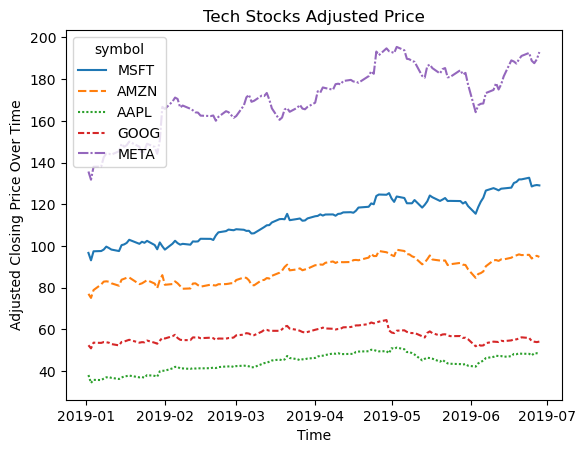

In [10]:
import seaborn as sns

sns.lineplot(data=stock_data, x="date", y="adjClose", hue="symbol",style="symbol")
plt.title("Tech Stocks Adjusted Price")
plt.xlabel("Time")
plt.ylabel("Adjusted Closing Price Over Time")
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

In [11]:
#function for simple rate of return

def rate_of_return(adj_closings):
    daily_simple_ror=np.diff(adj_closings)/adj_closings[:-1]
    return daily_simple_ror

In [12]:
stock_data["simple_rate_of_return"]=rate_of_return(stock_data["adjClose"])

stock_data.head(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,simple_rate_of_return
0,MSFT,2019-01-02 00:00:00+00:00,101.12,101.75,98.94,99.55,35329345,96.612169,97.214084,94.529351,95.112158,35329345,0.0,1.0,-0.036788
1,MSFT,2019-01-03 00:00:00+00:00,97.40,100.19,97.20,100.10,42578410,93.058003,95.723627,92.866918,95.637639,42578410,0.0,1.0,0.046509
2,MSFT,2019-01-04 00:00:00+00:00,101.93,102.51,98.93,99.72,44060620,97.386060,97.940204,94.519797,95.274579,44060620,0.0,1.0,0.001275
3,MSFT,2019-01-07 00:00:00+00:00,102.06,103.27,100.98,101.64,35656136,97.510264,98.666324,96.478410,97.108987,35656136,0.0,1.0,0.007251
4,MSFT,2019-01-08 00:00:00+00:00,102.80,103.97,101.71,103.04,31514415,98.217276,99.335118,97.175867,98.446577,31514415,0.0,1.0,0.014300
5,MSFT,2019-01-09 00:00:00+00:00,104.27,104.88,103.24,103.86,32280840,99.621745,100.204551,98.637661,99.230022,32280840,0.0,1.0,-0.006426
6,MSFT,2019-01-10 00:00:00+00:00,103.60,103.75,102.38,103.22,30067556,98.981613,99.124926,97.815999,98.618553,30067556,0.0,1.0,-0.007722
7,MSFT,2019-01-11 00:00:00+00:00,102.80,103.44,101.64,103.19,28314202,98.217276,98.828745,97.108987,98.589890,28314202,0.0,1.0,-0.007296
8,MSFT,2019-01-14 00:00:00+00:00,102.05,102.87,101.26,101.90,28437079,97.500710,98.284155,96.745927,97.357397,28437079,0.0,1.0,0.029005
9,MSFT,2019-01-15 00:00:00+00:00,105.01,105.05,101.88,102.51,31587616,100.328756,100.366973,97.338288,97.940204,31587616,0.0,1.0,0.003523


In [17]:
stock_data= stock_data[(stock_data['date'] > '2019-01-02') & (stock_data['date'] < '2019-06-20')]

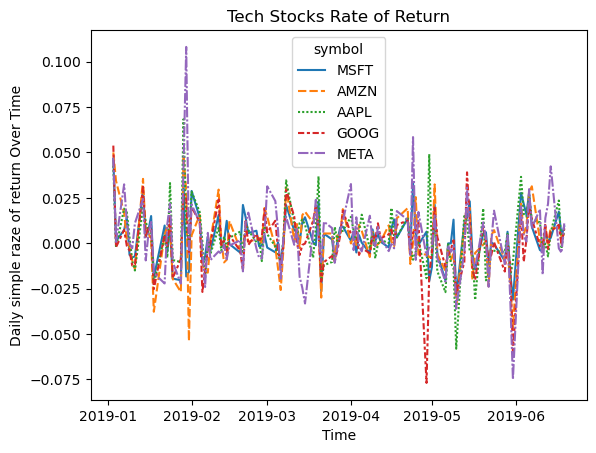

In [18]:
sns.lineplot(data=stock_data, x="date", y="simple_rate_of_return", hue="symbol",style="symbol")
plt.title("Tech Stocks Rate of Return")
plt.xlabel("Time")
plt.ylabel("Daily simple raze of return Over Time")
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

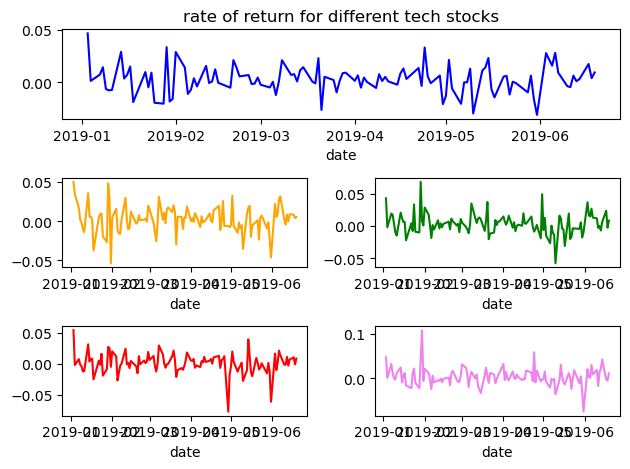

In [19]:
plt.subplot(3,1,1)
sns.lineplot(data=stock_data[stock_data["symbol"]=="MSFT"], x="date", y="simple_rate_of_return", color="blue")
plt.ylabel("")
plt.title("rate of return for different tech stocks")

plt.subplot(3,2,3)
sns.lineplot(data=stock_data[stock_data["symbol"]=="AMZN"], x="date", y="simple_rate_of_return", color="orange")
plt.ylabel("")

plt.subplot(3,2,4)
sns.lineplot(data=stock_data[stock_data["symbol"]=="AAPL"], x="date", y="simple_rate_of_return", color="green")
plt.ylabel("")

plt.subplot(3,2,5)
sns.lineplot(data=stock_data[stock_data["symbol"]=="GOOG"], x="date", y="simple_rate_of_return", color="red")
plt.ylabel("")

plt.subplot(3,2,6)
sns.lineplot(data=stock_data[stock_data["symbol"]=="META"], x="date", y="simple_rate_of_return", color="violet")
plt.ylabel("")


plt.tight_layout() 
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

In [23]:
mean_rate_of_return =stock_data.groupby(["symbol"]).simple_rate_of_return.mean().reset_index()
mean_rate_of_return

,symbol,simple_rate_of_return
0,AAPL,0.003125
1,AMZN,0.002263
2,GOOG,0.000903
3,META,0.003346
4,MSFT,0.003099


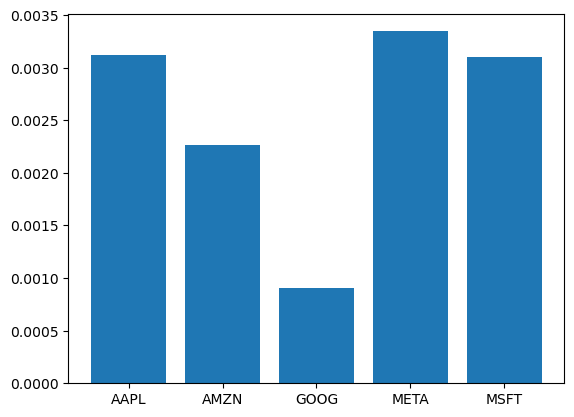

In [26]:
plt.bar(x="symbol", height="simple_rate_of_return", data=mean_rate_of_return)
plt.show()

**The best option to invest in seems Meta because it has the highest mean simple rate of return**

### 7. Calculate and plot the variance.

In [27]:
variance_rate_of_return =stock_data.groupby(["symbol"]).simple_rate_of_return.var().reset_index()
variance_rate_of_return

,symbol,simple_rate_of_return
0,AAPL,0.000268
1,AMZN,0.000287
2,GOOG,0.000259
3,META,0.000420
4,MSFT,0.000179


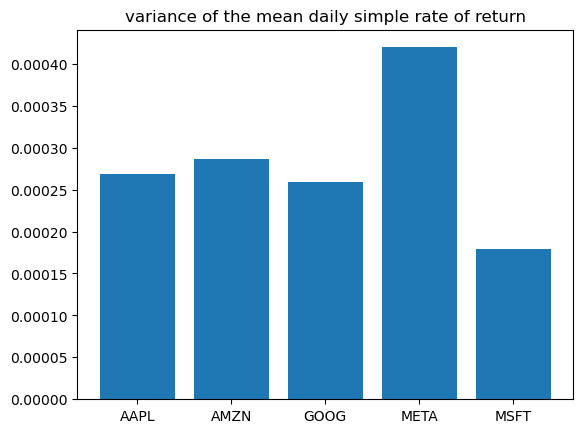

In [29]:
plt.bar(x="symbol", height="simple_rate_of_return", data=variance_rate_of_return)
plt.title("variance of the mean daily simple rate of return")
plt.show()

**Facebook has the highest variance, thus, it is also the most risky investment. This means that now, the best option to invest seems to be Microsoft (second best stock in terms of rate of return, and also the least risky investment**

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

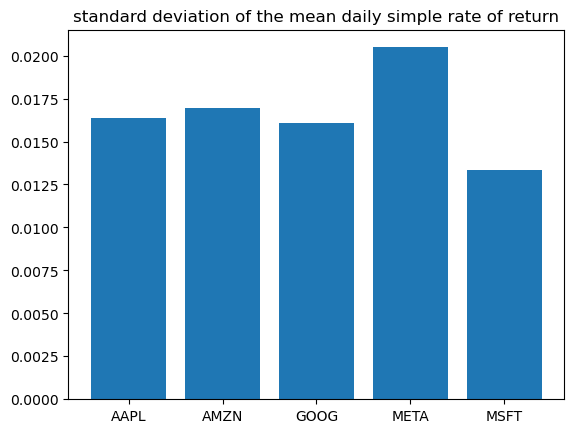

In [31]:
stdev_rate_of_return =stock_data.groupby(["symbol"]).simple_rate_of_return.std().reset_index()
stdev_rate_of_return

plt.bar(x="symbol", height="simple_rate_of_return", data=stdev_rate_of_return)
plt.title("standard deviation of the mean daily simple rate of return")
plt.show()

**the results with the standard deviation confirm the conclusion made using the variance**

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [37]:
np.corrcoef([stock_data[stock_data["symbol"]=="AAPL"]["simple_rate_of_return"], 
            stock_data[stock_data["symbol"]=="AMZN"]["simple_rate_of_return"],
            stock_data[stock_data["symbol"]=="GOOG"]["simple_rate_of_return"],
            stock_data[stock_data["symbol"]=="META"]["simple_rate_of_return"],
            stock_data[stock_data["symbol"]=="MSFT"]["simple_rate_of_return"]])

array([[1.        , 0.61722397, 0.57439078, 0.44143801, 0.62337812],
       [0.61722397, 1.        , 0.71700324, 0.56957383, 0.72292168],
       [0.57439078, 0.71700324, 1.        , 0.62498553, 0.61489478],
       [0.44143801, 0.56957383, 0.62498553, 1.        , 0.43303652],
       [0.62337812, 0.72292168, 0.61489478, 0.43303652, 1.        ]])

**None of the stocks are negatively correlated. All correlations are medium to strong correlations. **